###Obrada informacija

#4. Laboratorijska vježba:  Multivarijatni financijski vremenski nizovi


## Uvod

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne dnevne cijene 8 ETF-ova (eng. *exchange traded fund*) koji prate određene dioničke, obvezničke ili druge indekse.

Ticker | Fond | Klasa imovine
--- | --- | ---
SPY | SPDR S&P 500 ETF Trust | Equity: U.S. - Large Cap
VTI | Vanguard Total Stock Market ETF | Equity: U.S. - Total Market
QQQ | Invesco QQQ Trust | Equity: U.S. - Large Cap
VEA | Vanguard FTSE Developed Markets ETF | Equity: Developed Markets Ex-U.S. - Total Market
AGG | iShares Core U.S. Aggregate Bond ETF | Fixed Income: U.S. - Broad Market, Broad-based Investment Grade
BND | Vanguard Total Bond Market ETF | Fixed Income: U.S. - Broad Market, Broad-based Investment Grade
LQD | iShares iBoxx USD Investment Grade Corporate Bond ETF | Fixed Income: U.S. - Corporate, Broad-based Investment Grade
VCIT | Vanguard Intermediate-Term Corporate Bond ETF | Fixed Income: U.S. - Corporate, Broad-based Investment Grade Intermediate

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, najčešće se koriste povrati:

$R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$

gdje je $S(t)$ cijena vrijednosnice u danu $t$. U sklopu ove laboratorijske vježbe cilj je analizirati kretanje danih ETF-ova i izračunati glavne komponente (PCA) koje utječu na njihovu dinamiku. Laboratorijsku vježbu je potrebno riješiti unutar ove bilježnice i predati riješenu bilježnicu kao izvještaj.

In [5]:
import pandas as pd

prices = pd.read_csv('ETFprices.csv')
prices.set_index('Time', inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()


,SPY,VTI,QQQ,VEA,AGG,BND,LQD,VCIT
Time,,,,,,,,
2022-01-10,458.078430,231.924240,377.329224,49.100105,109.858536,81.452065,125.620148,88.636536
2022-01-11,462.250763,234.236588,382.997437,49.682655,110.063812,81.617920,125.998177,88.753113
2022-01-12,463.500458,234.600677,384.516266,50.216679,110.063812,81.588654,125.910950,88.811386
2022-01-13,457.114075,231.166565,374.897156,49.857430,110.259331,81.725235,126.308357,88.976517
2022-01-14,457.301086,231.255142,377.229950,49.740917,109.643509,81.276474,125.193680,88.481125


# Zadatak 1 - Računanje korelacijske matrice i matrice kovarijance povrata

1.1. U prvom zadatku ove laboratorijske vježbe potrebno je prvo iz danih cijena (gore učitanih u Pandas DataFrame) izračunati dnevne povrate za sve pojedine vrijednosnice (prateći formulu danu u uvodu). 

Izračunajte srednje povrate i volatilnost (standardnu devijaciju povrata) za svaku pojedinu vrijednosnicu. Pri analizi srednjih povrata i volatilnosti, te se brojke često *anualiziraju* - to znači da se srednji povrati pomnože s $252$ (cca. broj trgovinskih dana u godini), a volatilnost s $\sqrt{252}$. Izračunajte anualizirane srednje povrate i volatilnosti te rezultate ispišite u konzolu. 


In [6]:
import numpy as np
import plotly.graph_objects as go


In [7]:
prices.shape
type(prices)

pandas.core.frame.DataFrame

In [8]:
daily_returns = prices.pct_change()

In [9]:
daily_returns.head()

,SPY,VTI,QQQ,VEA,AGG,BND,LQD,VCIT
Time,,,,,,,,
2022-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-11,0.009108,0.009970,0.015022,0.011865,0.001869,0.002036,0.003009,0.001315
2022-01-12,0.002704,0.001554,0.003966,0.010749,0.000000,-0.000359,-0.000692,0.000657
2022-01-13,-0.013779,-0.014638,-0.025016,-0.007154,0.001776,0.001674,0.003156,0.001859
2022-01-14,0.000409,0.000383,0.006222,-0.002337,-0.005585,-0.005491,-0.008825,-0.005568


In [10]:
print(daily_returns.index)

DatetimeIndex(['2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-24',
               ...
               '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09'],
              dtype='datetime64[ns]', name='Time', length=251, freq=None)


In [11]:
daily_returns = daily_returns.drop(labels='2022-01-10', axis=0)

In [12]:
mean_returns = np.mean(daily_returns)
std_dev_returns = np.std(daily_returns)
ann_mean_returns = mean_returns * 252
ann_std_dev_returns = std_dev_returns * np.sqrt(252)

c:\Users\Luka\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [13]:
ann_mean_returns.head()

SPY   -0.138092
VTI   -0.148174
QQQ   -0.283459
VEA   -0.092129
AGG   -0.098139
dtype: float64

In [14]:
ann_std_dev_returns.head()

SPY    0.243167
VTI    0.249412
QQQ    0.321417
VEA    0.224236
AGG    0.081142
dtype: float64

1.2 Koristeći dnevne povrate, potrebno je izračunati matricu kovarijance $\Sigma$ i matricu korelacije $C$ svih ETF-ova. Kovarijancu i korelaciju moguće je iz podataka izračunati koristeći Pandas, ali i NumPy ili neke druge biblioteke. Matrice ispišite u konzolu ili vizualizirajte. 

In [15]:
cov_matrix = daily_returns.cov()
corr_matrix = daily_returns.corr()

In [16]:
cov_matrix.head()

,SPY,VTI,QQQ,VEA,AGG,BND,LQD,VCIT
SPY,0.000236,0.000241,0.000301,0.000189,0.000026,0.000026,0.000057,0.000045
VTI,0.000241,0.000248,0.000310,0.000195,0.000027,0.000027,0.000059,0.000046
QQQ,0.000301,0.000310,0.000412,0.000236,0.000033,0.000033,0.000073,0.000056
VEA,0.000189,0.000195,0.000236,0.000200,0.000025,0.000025,0.000054,0.000042
AGG,0.000026,0.000027,0.000033,0.000025,0.000026,0.000026,0.000038,0.000029


In [17]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Heatmap(z=cov_matrix))

fig.update_layout(title="Covariance Matrix Heatmap")
fig.update_xaxes(ticktext=["SPY", "VTI", "QQQ", "VEA", "AGG", "BND", "LQD", "VCIT"],
                tickvals=[0,1,2,3,4,5,6,7])
fig.update_yaxes(ticktext=["SPY", "VTI", "QQQ", "VEA", "AGG", "BND", "LQD", "VCIT"],
                tickvals=[0,1,2,3,4,5,6,7])
fig.show()


In [18]:
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Heatmap(z=corr_matrix))

fig.update_layout(title="Correlation Matrix Heatmap")
fig.update_xaxes(ticktext=["SPY", "VTI", "QQQ", "VEA", "AGG", "BND", "LQD", "VCIT"],
                tickvals=[0,1,2,3,4,5,6,7])
fig.update_yaxes(ticktext=["SPY", "VTI", "QQQ", "VEA", "AGG", "BND", "LQD", "VCIT"],
                tickvals=[0,1,2,3,4,5,6,7])
fig.show()


# Zadatak 2 - Analiza glavnih komponenti

2.1. Izračunajte svojstvene vektore i pripadajuće svojstvene vrijednosti matrice kovarijance povrata $\Sigma$ (svojstvenu dekompoziciju možete pronaći u sklopu biblioteke NumPy https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html). Poredajte komponente padajući po svojstvenim vrijednostima i prikažite svojstvene vrijednosti grafički.


In [19]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sort_eigenvalues = eigenvalues[np.argsort(eigenvalues)[::-1]]
sort_eigenvectors = eigenvectors[np.argsort(eigenvalues)[::-1]]
print("eigenvalues: ",eigenvalues)
print("eigenvectors: ", eigenvectors)

eigenvalues:  [1.06843764e-03 1.14431592e-04 4.71779036e-05 1.04538659e-05
 2.30500566e-06 9.10298764e-08 1.03665714e-06 6.26834728e-07]
eigenvectors:  [[-4.64904458e-01 -9.54576346e-02 -5.58389257e-02  5.51081594e-01
   1.35660778e-02  2.55943102e-02 -2.74957946e-02 -6.82896515e-01]
 [-4.77915775e-01 -9.05639056e-02 -5.56795961e-02  4.77754842e-01
   8.52452617e-03 -3.46843672e-02  8.51330063e-02  7.23547844e-01]
 [-6.07707654e-01 -1.78766936e-01 -4.40456618e-01 -6.34337891e-01
   1.68942837e-02  8.90118622e-03 -2.69818362e-02 -3.54193478e-02]
 [-3.90043156e-01  5.05922198e-02  8.83505866e-01 -2.52538314e-01
   2.54160858e-02 -3.98437380e-04  2.64066264e-03 -1.71883358e-02]
 [-6.15252395e-02  4.31329029e-01 -6.68344805e-02 -1.05151759e-03
   5.13346684e-01  7.13875838e-01  1.79735382e-01  1.59255409e-02]
 [-6.10525610e-02  4.27180576e-01 -7.22407880e-02 -1.34251153e-02
   5.27046789e-01 -6.98649121e-01  2.00759302e-01 -4.68739347e-02]
 [-1.28587565e-01  6.04272557e-01 -8.07637081e-02 

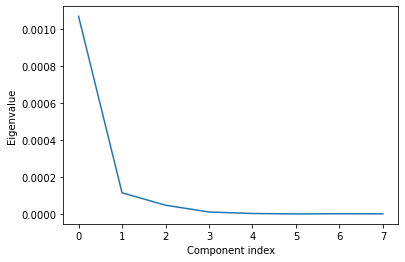

In [20]:
plt.plot(np.arange(len(eigenvalues)), eigenvalues)
plt.xlabel('Component index')
plt.ylabel('Eigenvalue')
plt.show()

2.2. Izračunajte koliki udio varijance objašnjavaju prve dvije komponente?

In [21]:
share = eigenvalues[:2].sum() / eigenvalues.sum()
print(share)

0.9504312602910401


2.3. Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti.  Ispišite (ili grafički prikažite) elemente prva dva svojstvena vektora. Pritom pripazite na to što vraća funkcija koju koristite i u kojoj se dimenziji (stupac ili red) nalaze svojstveni vektori.

S obzirom na to koje vrijednosnice opisuju prve dvije komponente, možete li zaključiti koju klasu imovine opisuje prva komponenta (koja odgovara prvom svojstvenom vektoru), a koju klasu druga komponenta? (*odgovor napišite u nastavku*)

In [22]:
eigenvectors[:,0] #svaki stupac jedan svojstveni vektor; VTI QQQ

array([-0.46490446, -0.47791577, -0.60770765, -0.39004316, -0.06152524,
       -0.06105256, -0.12858756, -0.09985274])

2.4. Ponovite prethodnu analizu za matricu korelacije povrata $C$. Koliki udio varijance u tom sučaju objašnjavaju prve dvije komponente? Usporedite elemente prva dva svojstvena vektora u ovom slučaju i u prethodnom slučaju - razlikuje li se interpretacija i kako? (*odgovor napišite u nastavku*)

In [23]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
sort_eigenvalues = eigenvalues[np.argsort(eigenvalues)[::-1]]
sort_eigenvectors = eigenvectors[np.argsort(eigenvalues)[::-1]]
print("eigenvalues: ",eigenvalues)
print("eigenvectors: ", eigenvectors)

eigenvalues:  [5.45093694e+00 2.21775258e+00 2.06517959e-01 5.93174393e-02
 3.50099828e-02 2.43456743e-02 2.50477346e-03 3.61464674e-03]
eigenvectors:  [[-3.52813314e-01 -3.70425852e-01  1.92050448e-01  3.06996917e-02
   4.66194600e-01  1.70747647e-01 -6.43740382e-01  1.98966746e-01]
 [-3.54616309e-01 -3.68174181e-01  1.85479353e-01  3.38508185e-02
   3.67881837e-01  1.56381410e-01  7.11444139e-01 -1.92877224e-01]
 [-3.42784385e-01 -3.70454553e-01  4.16997907e-01  5.56174948e-02
  -7.04837975e-01 -2.60790263e-01 -5.65984548e-02 -1.64381369e-02]
 [-3.38481339e-01 -3.14040010e-01 -8.67612456e-01  7.79488919e-02
  -1.61521429e-01 -4.04365321e-02 -1.44349530e-02  7.01419409e-03]
 [-3.41134791e-01  3.98058713e-01  2.21206938e-02  4.53694507e-01
   1.09486220e-02  7.21639205e-02 -1.99512992e-01 -6.88269821e-01]
 [-3.40759764e-01  3.97877925e-01  3.86371524e-02  4.81307968e-01
  -4.18209571e-02  7.68160789e-02  1.89457001e-01  6.69986636e-01]
 [-3.76498726e-01  2.96006388e-01  3.74475214e-04 

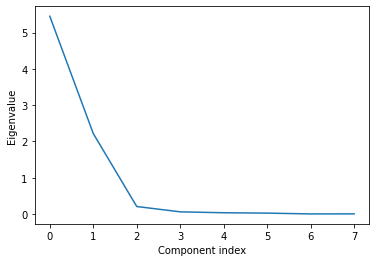

In [24]:
plt.plot(np.arange(len(eigenvalues)), eigenvalues)
plt.xlabel('Component index')
plt.ylabel('Eigenvalue')
plt.show()

# Zadatak 3 - Svojstveni portfelji

U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji. 

Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Često je dobro pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:

$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.

Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.

Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:

$R_p = \sum{R_i w_i} = R\cdot w$.


Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve dvije glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta dva svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100). Također izračunajte anualizirane srednje vrijednosti i volatilnosti svojstvenih portfelja.



In [37]:
w = np.zeros((daily_returns.shape[1], 2))

(8, 2)

In [45]:
for i in range(2):  
    w[:, i] = (eigenvectors[:,i] / np.sum(np.abs(eigenvectors[:,i])))


In [54]:
eigen_portf = daily_returns.dot(w)

,0,1
Time,,
2022-01-11,-0.006680,-0.004805
2022-01-12,-0.002254,-0.002339
2022-01-13,0.006363,0.008848
2022-01-14,0.002684,-0.003746
2022-01-18,0.013193,0.006259
...,...,...
2023-01-03,-0.001708,0.004180
2023-01-04,-0.007641,-0.001438
2023-01-05,0.006758,0.005778


In [55]:
eigen_price1 = (1 + eigen_portf[0]).cumprod() * 100
eigen_price2 = (1 + eigen_portf[1]).cumprod() * 100

In [56]:
ann_mean1 = eigen_price1.mean() * 252
ann_mean2 = eigen_price2.mean() * 252
print(ann_mean1, ann_mean2)

28272.0934842155 25699.875729568783


In [57]:
ann_vol1 = eigen_price1.std() * np.sqrt(252)
ann_vol2 = eigen_price2.std() * np.sqrt(252)

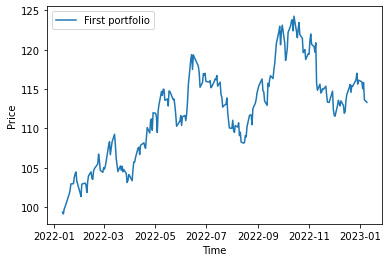

In [58]:
plt.plot(eigen_price1, label='First portfolio')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


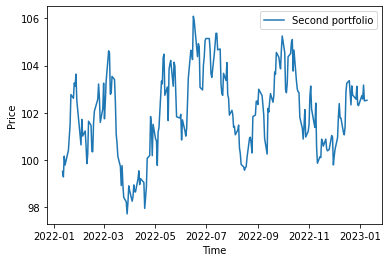

In [59]:
plt.plot(eigen_price2, label='Second portfolio')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Ako usporedite dobivene rezultate s kretanjem cijena originalnih vrijednosnica, vidjet ćete sličnosti između vrijednosnica koje pripadaju određenim klasama imovina i pojedinih svojstvenih portfelja. Svojstveni portfelji dakle predstavljaju niže-dimenzionalan prostor tzv. sintetičkih vrijednosnica (u našem slučaju 2 umjesto originalnih 8) koje najbolje opisuju cijeli razmatrani skup podataka. Dobra procjena tih komponenti je ključna u razumijevanju zajedničkog kretanja većih skupova dionica i upravljanju financijskim rizikom.